In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

# EDA Analysis and Data Wrangling

## Dataset

# Smartphone Dataset: EDA and Data Wrangling

This dataset is about smartphones that were extracted through web scraping. Regarding the dataset, there are records of 980 smartphones with 22 known features. These variables are as follows:

* **brand_name:** The brand of the smartphone.
* **model:** The smartphone's model name.
* **price:** Market price of the smartphone. (The price is in Rupees; 82.68 Rupees ≈ 1 Dollar)
* **avg_rating:** Average rating.
* **5G_or_not:** Whether it has 5G capability or not.
* **processor_brand:** Processor brand.
* **num_cores:** Number of cores.
* **processor_speed:** Processor speed.
* **battery_capacity:** Battery capacity.
* **fast_charging_available:** Whether it has fast charging capability or not.
* **fast_charging:** Charging speed.
* **ram_capacity:** RAM capacity.
* **internal_memory:** Internal memory capacity.
* **screen_size:** Screen size.
* **refresh_rate:** Frequency at which the screen updates images per second.
* **num_rear_cameras:** Number of rear cameras.
* **os:** Operating system.
* **primary_camera_rear:** Rear primary camera.
* **primary_camera_front:** Front primary camera.
* **extended_memory_available:** Whether external memory can be added or not.
* **resolution_height:** Number of pixels in the vertical dimension of the screen (affects image clarity and quality).
* **resolution_width:** Number of pixels in the horizontal dimension of the screen (affects image clarity and quality).


In [2]:
smartphones = pd.read_csv("smartphones.csv")
print(smartphones.shape)
smartphones.head()

(980, 22)


,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


### Features

In [3]:
smartphones.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [4]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [5]:
cat=["brand_name","model","processor_brand","os"]
num=["price","avg_rating","5G_or_not","num_cores","processor_speed","battery_capacity","fast_charging_available","fast_charging","ram_capacity","internal_memory",
     "screen_size","refresh_rate","num_rear_cameras","primary_camera_rear","primary_camera_front","extended_memory_available",
    "resolution_height","resolution_width"]

## EDA Numeric Features


### Converting Price from Rupees to Dollars for Better Understanding


In [6]:
# Convert Rupee Price to Dollars
def convert_rup(data):
    data = round(data/82.68,2)
    return data
smartphones["price"] = smartphones["price"].apply(convert_rup)

### Features Measurements


In [7]:
smartphones.describe().T

,count,mean,std,min,25%,50%,75%,max
price,980.0,393.329949,478.130411,42.32,157.22,241.83,429.26,7861.64
avg_rating,879.0,7.825825,0.740285,6.00,7.40,8.00,8.40,8.90
5G_or_not,980.0,0.560204,0.496616,0.00,0.00,1.00,1.00,1.00
num_cores,974.0,7.772074,0.836845,4.00,8.00,8.00,8.00,8.00
processor_speed,938.0,2.427217,0.464090,1.20,2.05,2.30,2.84,3.22
battery_capacity,969.0,4817.748194,1009.540054,1821.00,4500.00,5000.00,5000.00,22000.00
fast_charging_available,980.0,0.854082,0.353205,0.00,1.00,1.00,1.00,1.00
fast_charging,769.0,46.126138,34.277870,10.00,18.00,33.00,66.00,240.00
ram_capacity,980.0,6.560204,2.744378,1.00,4.00,6.00,8.00,18.00
internal_memory,980.0,141.036735,107.134516,8.00,64.00,128.00,128.00,1024.00


In [8]:
smartphones[num].median()

price                         241.83
avg_rating                      8.00
5G_or_not                       1.00
num_cores                       8.00
processor_speed                 2.30
battery_capacity             5000.00
fast_charging_available         1.00
fast_charging                  33.00
ram_capacity                    6.00
internal_memory               128.00
screen_size                     6.58
refresh_rate                   90.00
num_rear_cameras                3.00
primary_camera_rear            50.00
primary_camera_front           16.00
extended_memory_available       1.00
resolution_height            2400.00
resolution_width             1080.00
dtype: float64

### Features Distributions


<Figure size 500x500 with 0 Axes>

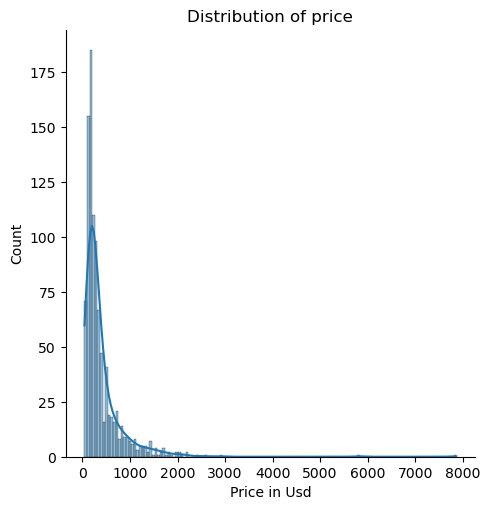

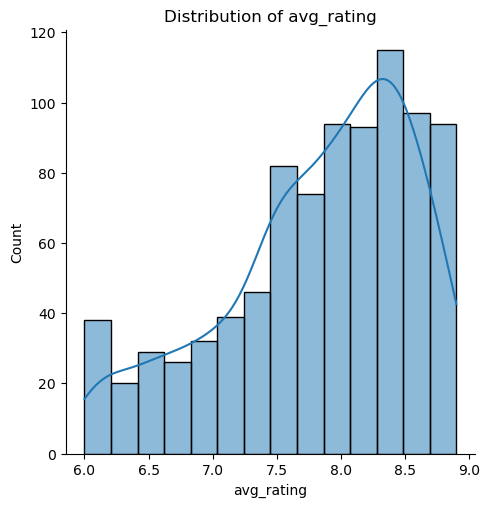

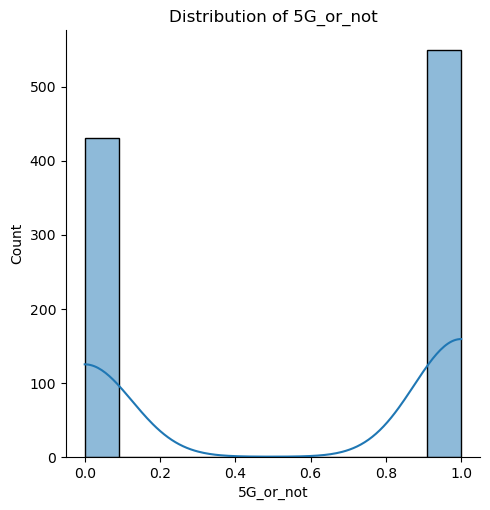

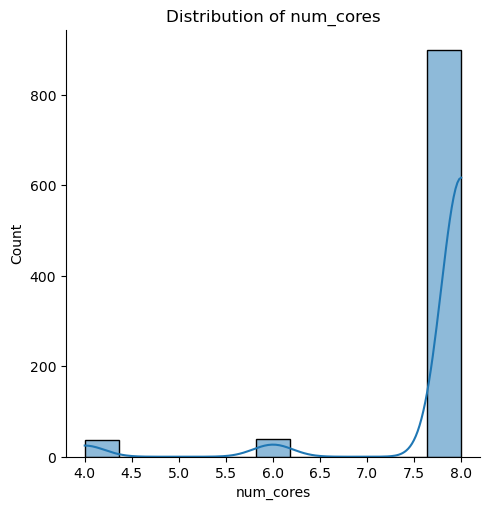

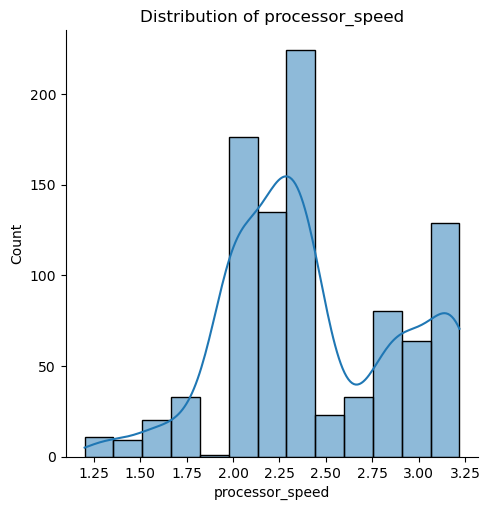

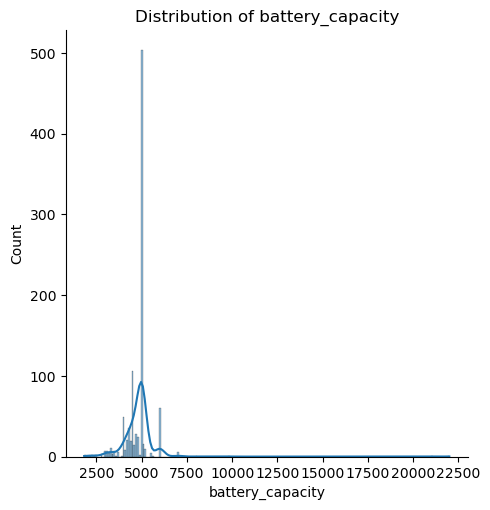

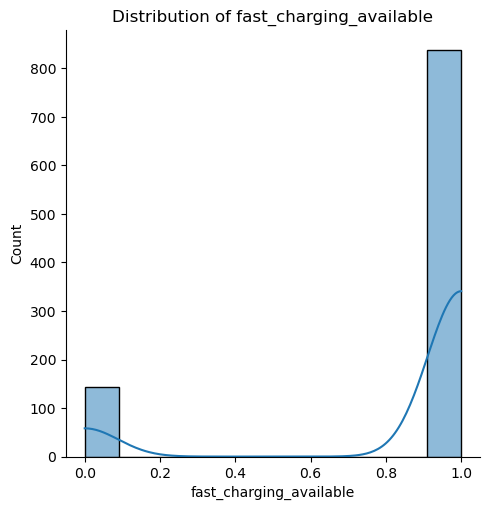

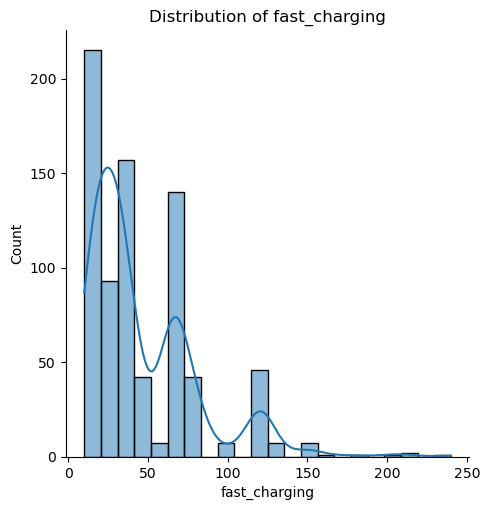

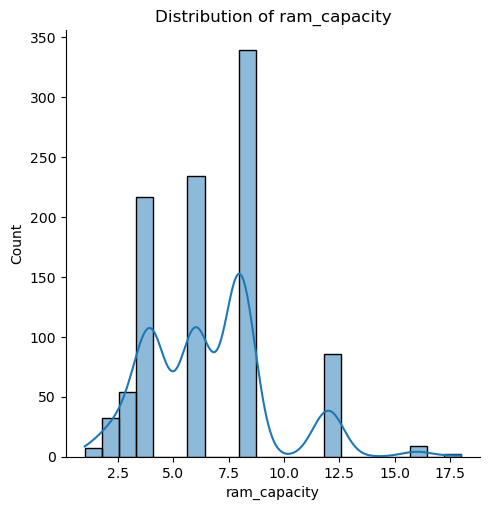

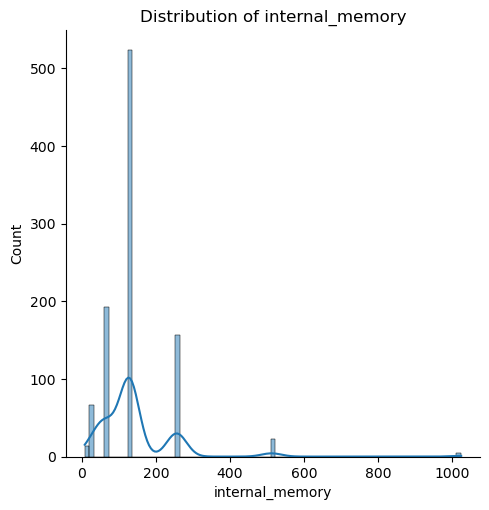

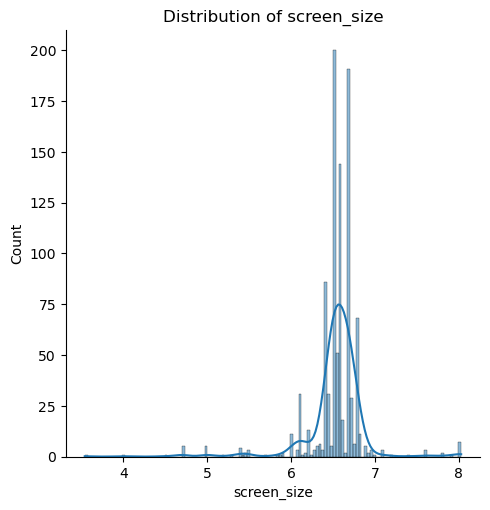

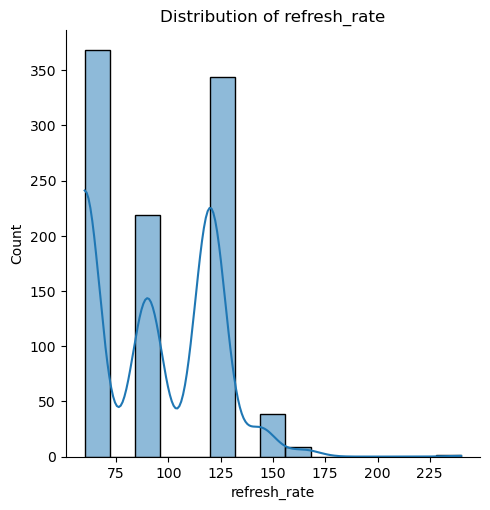

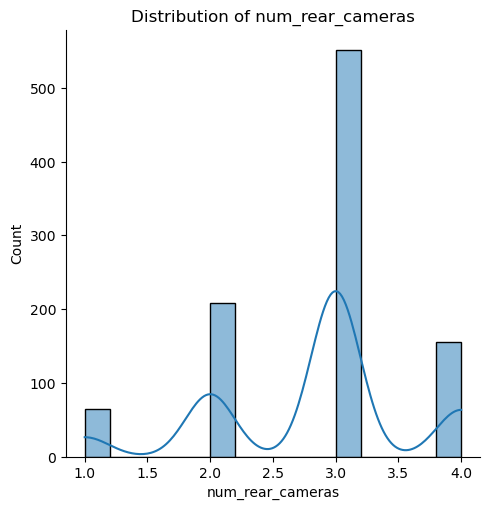

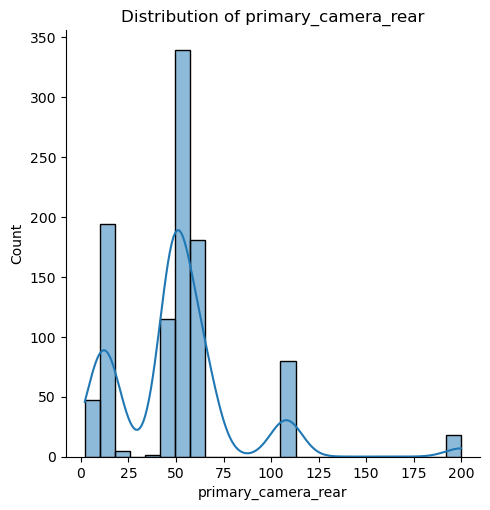

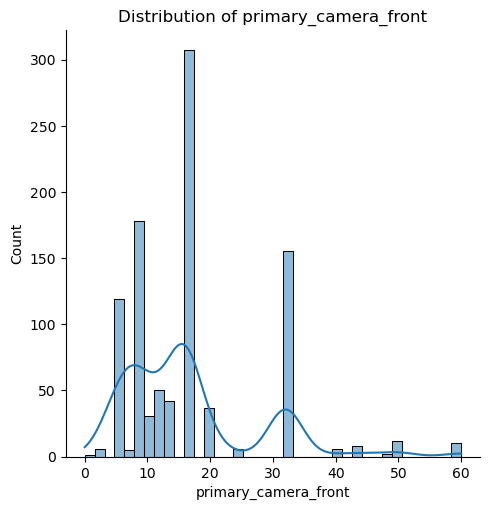

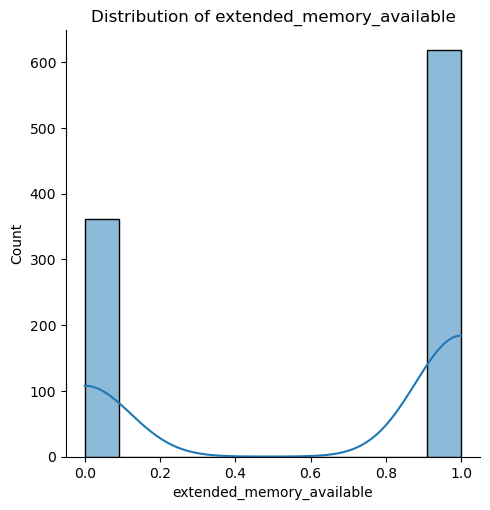

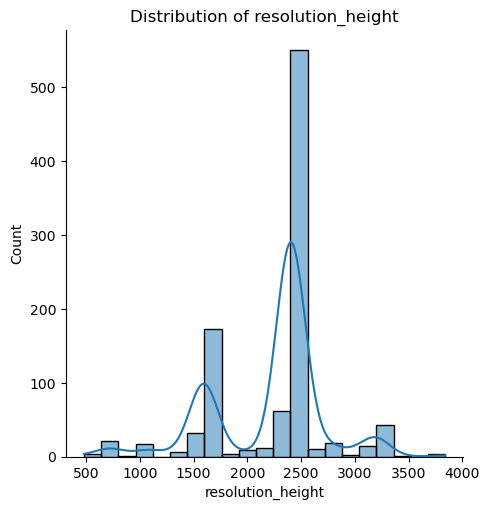

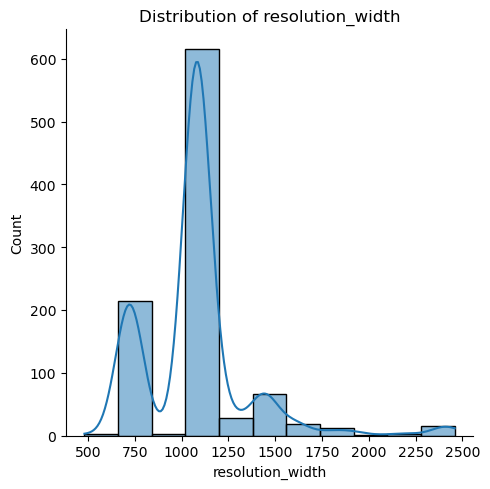

In [10]:
plt.figure(figsize=(5, 5))
for i in num:
    sns.displot(data=smartphones, x=i, kde=True)
    plt.title(f"Distribution of {i}")
    if i == "price":
        plt.xlabel("Price in Usd")
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

### Features Dispersion


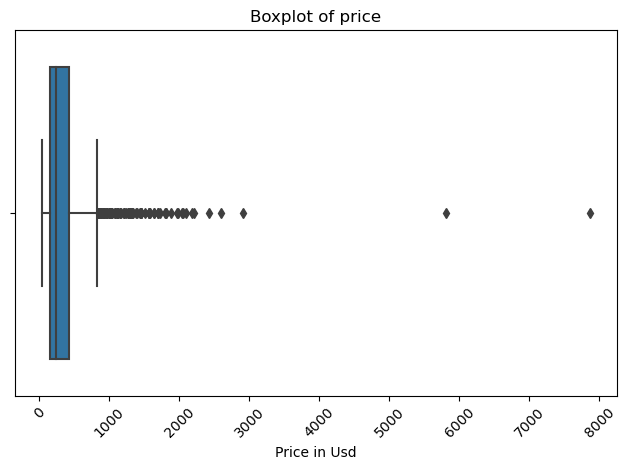

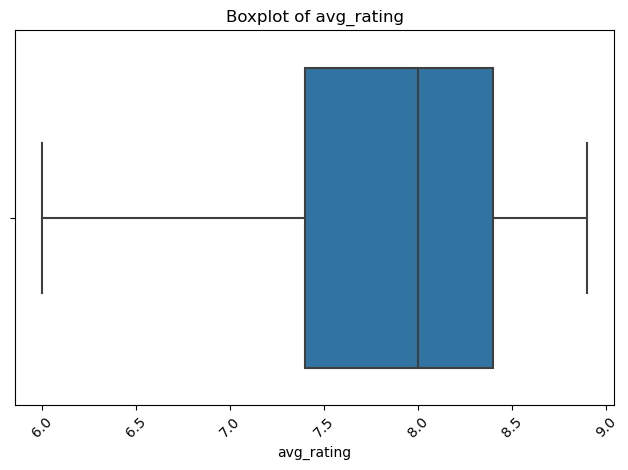

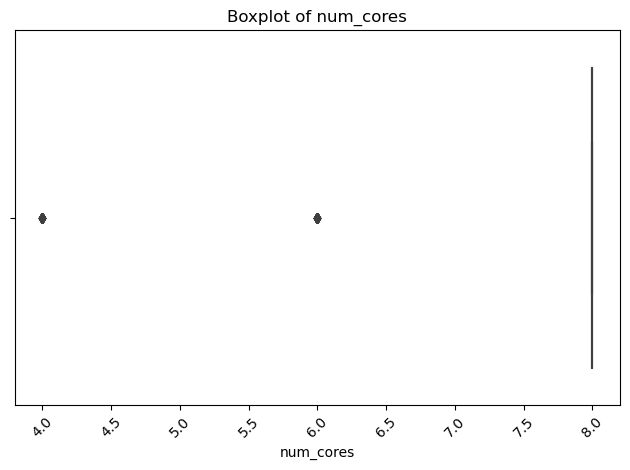

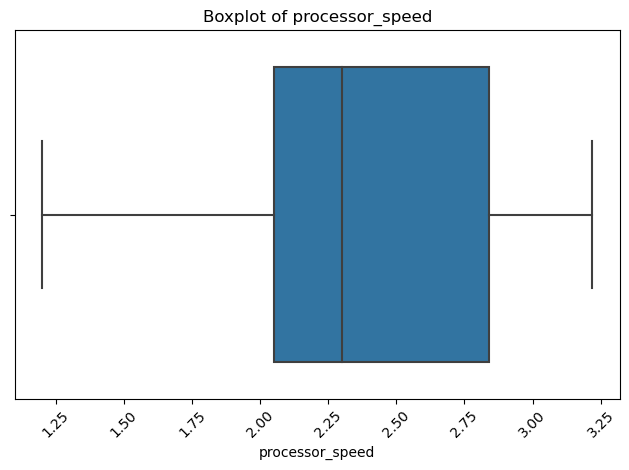

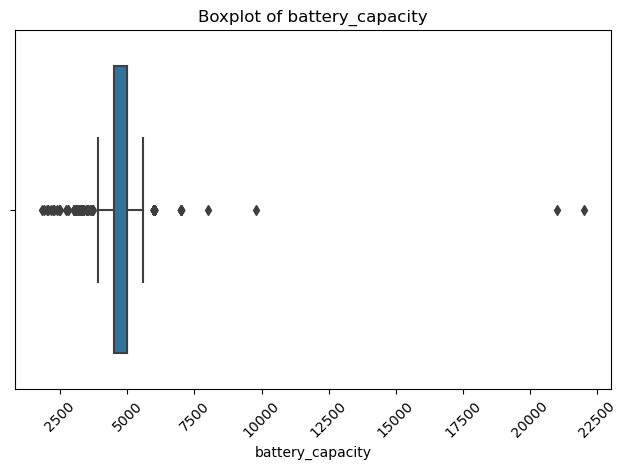

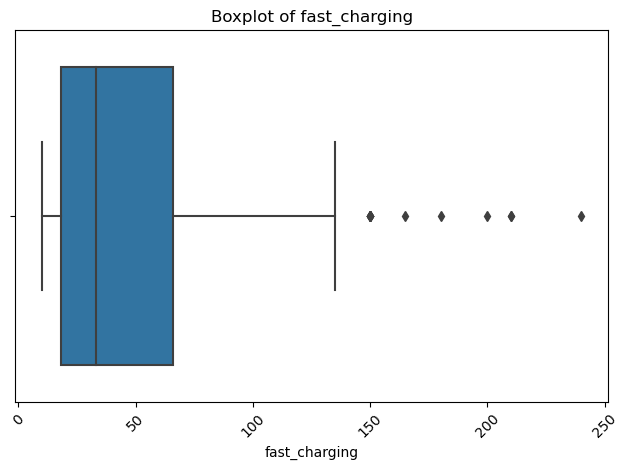

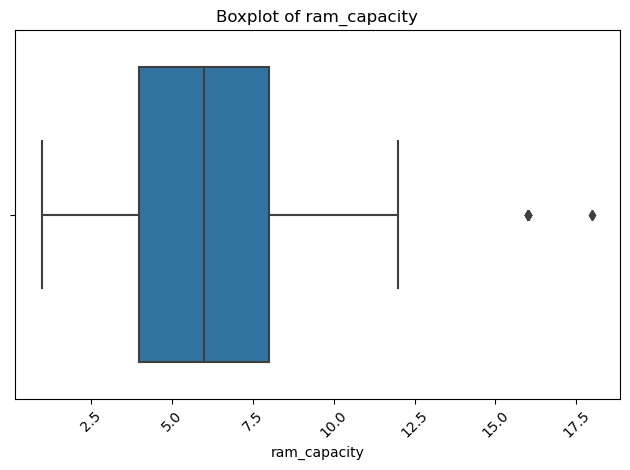

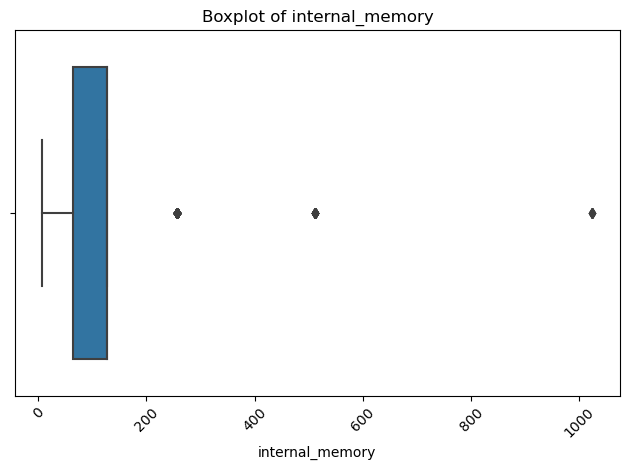

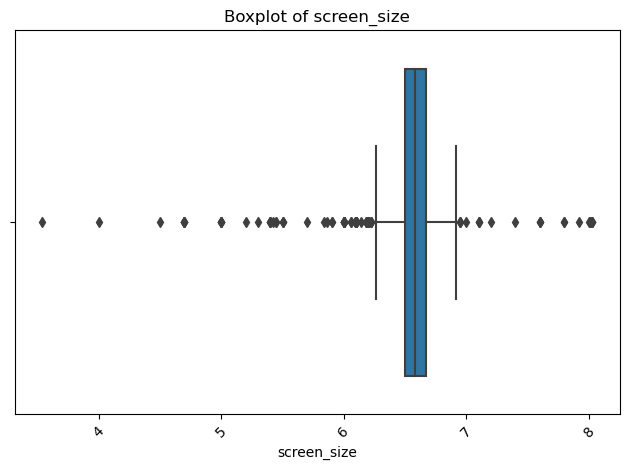

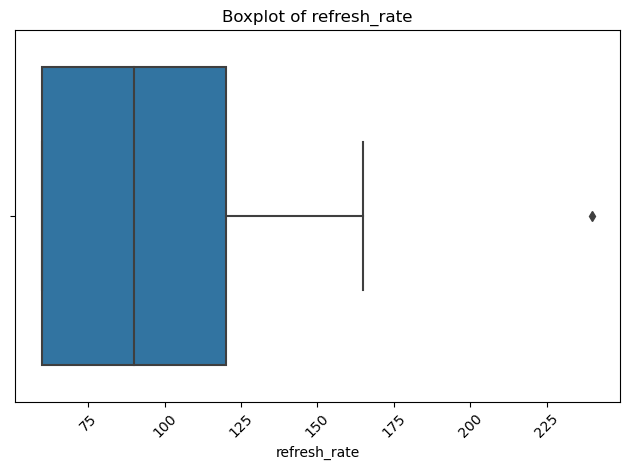

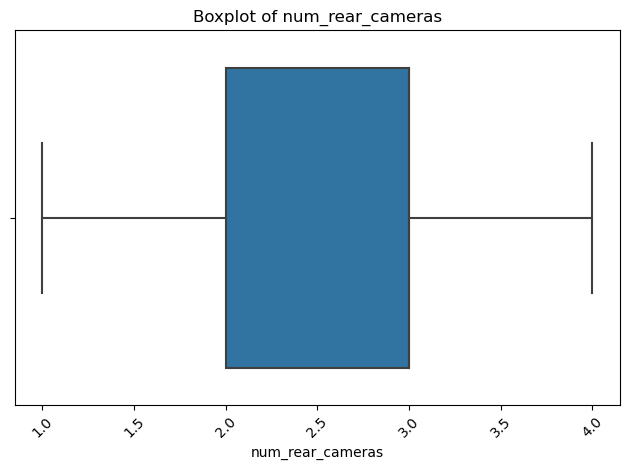

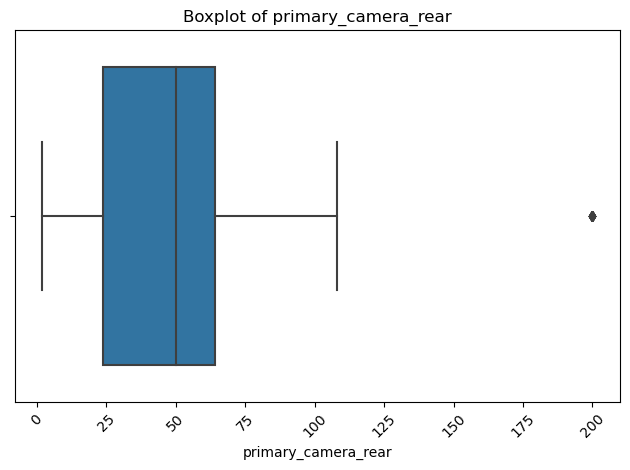

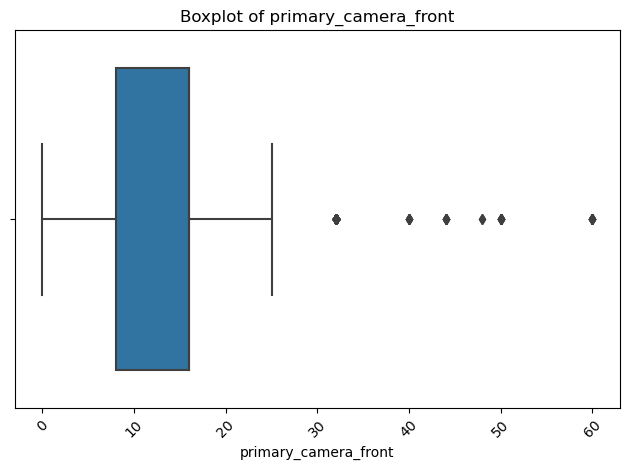

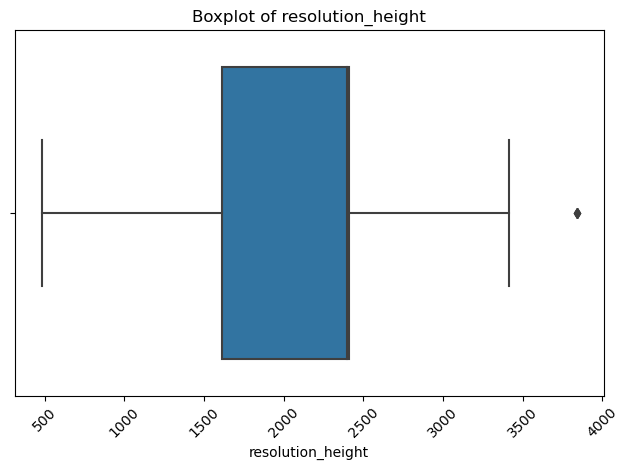

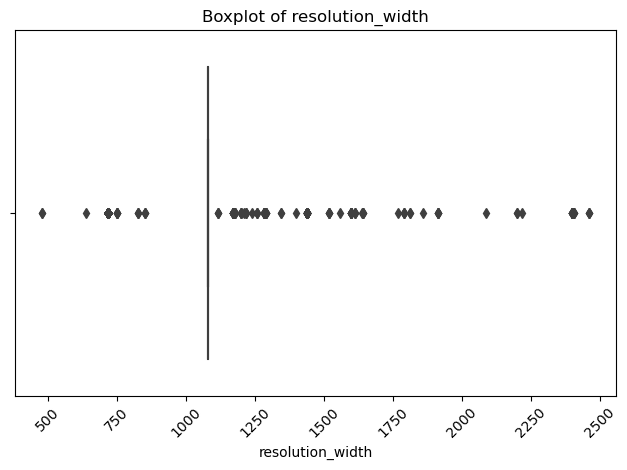

In [11]:
a = ["price","avg_rating","num_cores","processor_speed","battery_capacity","fast_charging","ram_capacity","internal_memory",
     "screen_size","refresh_rate","num_rear_cameras","primary_camera_rear","primary_camera_front","resolution_height","resolution_width"]
for i in a:
    sns.boxplot(data=smartphones, x=i)
    plt.title(f"Boxplot of {i}")
    if i == "price":
        plt.xlabel("Price in Usd")
    plt.xticks(rotation=45)  # Rotate X-axis Labels for Better Readability
    plt.tight_layout()  # Adjust Layout to Avoid Overlaps
    plt.show()

### Correlation Among Numeric Features

<Axes: >

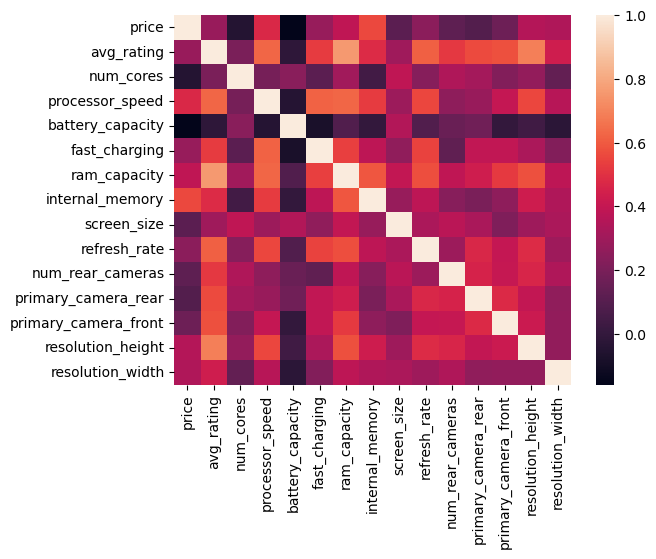

In [12]:
a = ["price","avg_rating","num_cores","processor_speed","battery_capacity","fast_charging","ram_capacity","internal_memory",
     "screen_size","refresh_rate","num_rear_cameras","primary_camera_rear","primary_camera_front","resolution_height","resolution_width"]
matr_cor = smartphones[a].corr()
sns.heatmap(matr_cor)

### Analyzing Detected Outliers


In [13]:
smartphones[smartphones["price"]>4000]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
732,vertu,Vertu Signature Touch,7861.64,6.2,0,snapdragon,8.0,1.5,2275.0,0,...,64,4.70,60,1,android,13.0,2.0,0,1920,1080
909,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,5805.52,8.8,0,snapdragon,8.0,2.8,4000.0,1,...,256,6.39,60,3,android,48.0,20.0,0,2340,1080


In [14]:
smartphones[smartphones["battery_capacity"]>10000]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
58,doogee,Doogee V Max,556.35,8.8,1,dimensity,8.0,2.6,22000.0,1,...,256,6.58,120,3,android,108.0,32.0,1,2408,1080
409,oukitel,Oukitel WP19,362.72,8.4,0,helio,8.0,2.0,21000.0,1,...,256,6.78,60,3,android,64.0,16.0,1,2400,1080


In [17]:
a = smartphones[["model","ram_capacity","price"]][smartphones["ram_capacity"] >= 16]
print(f"{len(a)} smartphones have 16GB or more of RAM")
a

11 smartphones have 16GB or more of RAM


,model,ram_capacity,price
48,Asus ROG Phone 6 Batman Edition,16,882.91
49,Asus ROG Phone 6 Pro 5G,18,1088.52
50,Asus ROG Phone 6D Ultimate,16,1306.12
51,Asus ROG Phone 7,18,919.09
138,iQOO 11 (16GB RAM + 256GB),16,786.15
190,Lenovo Legion Pro 2,16,725.68
287,OnePlus 10T (16GB RAM + 256GB),16,677.30
385,OPPO Reno 10 Pro,16,519.96
401,OPPO Reno 9 Pro 5G,16,483.78
402,OPPO Reno 9 Pro Plus,16,556.35


In [18]:
a = smartphones[["model","refresh_rate","price"]][smartphones["refresh_rate"] >= 225]
a

,model,refresh_rate,price
189,Leitz Phone 2,240,1511.73


### Conclusions


* The charging capacity variable has extremely extreme values. While 75% of the data is below the value of "5000," the maximum value is "22000," leading to a significant dispersion of data around its mean. However, these values are not erroneous. The models "Doogee V Max" and "Oukitel WP19" have battery capacities of 22,000 mAh and 21,000 mAh respectively.
* The variables "5G_or_not," "fast_charging_available," and "extended_memory_available" appear as numeric, but they are actually binary categorical variables with {0: False, 1: True}.
* There are 2 smartphones whose prices deviate significantly from the rest, but after market analysis, I confirmed that these are their actual prices and not errors. The models are **"Vertu Signature Touch"** and **"Xiaomi Redmi K20 Pro Signature Edition"**, both of which are limited edition models from their respective brands, justifying the high price.
* The vast majority of models have 8 cores.
* Most models have between 4 and 8 GB of RAM. However, there are 11 models that deviate significantly from the mean, with 16 to 18 GB of RAM.
* The only model with a "refresh rate" greater than 160 is the **Leitz Phone 2** with a value of 240, which is accurate upon further investigation.

There are a significant number of outliers in the data, but they are due to specific characteristics of the models rather than errors in the data.


## Categorical Features

### Number of Unique Values


In [19]:
for c in cat:
    print(smartphones[c].nunique())

46
980
13
3


The dataset contains data for:
- 46 phone brands.
- 980 smartphone models.
- 13 processor brands.
- 3 operating systems.


In [21]:
for c in ["brand_name","processor_brand","os"]:
    print(f"Unique values of: {c}")
    print()
    print(smartphones[c].unique())
    print()

Unique values of: brand_name

['apple' 'asus' 'blackview' 'blu' 'cat' 'cola' 'doogee' 'duoqin' 'gionee'
 'google' 'honor' 'huawei' 'ikall' 'infinix' 'iqoo' 'itel' 'jio' 'lava'
 'leeco' 'leitz' 'lenovo' 'letv' 'lg' 'lyf' 'micromax' 'motorola' 'nokia'
 'nothing' 'nubia' 'oneplus' 'oppo' 'oukitel' 'poco' 'realme' 'redmi'
 'royole' 'samsung' 'sharp' 'sony' 'tcl' 'tecno' 'tesla' 'vertu' 'vivo'
 'xiaomi' 'zte']

Unique values of: processor_brand

['bionic' 'fusion' 'snapdragon' 'dimensity' 'helio' 'tiger' 'google'
 'kirin' nan 'spreadtrum' 'unisoc' 'sc9863a' 'mediatek' 'exynos']

Unique values of: os

['ios' 'android' nan 'other']



In the brand values:
* "redmi" and "xiaomi" refer to the same brand.
* "leeco" and "letv" refer to the same brand.

In the processor brand values:
* "unisoc," "sc9863a," and "spreadtrum" refer to the same brand.
* There are null values.

In the OS variable values:
* There are NaN values.


In [22]:
for c in ["brand_name","processor_brand","os"]:
    print(f"Number of Variable Values {c}")
    print()
    print("Absolut count:")
    print()
    print(smartphones[c].value_counts(dropna=True))
    print("Relative count:")
    print()
    print(smartphones[c].value_counts(normalize=True,dropna=True)*100)

Number of Variable Values brand_name

Absolut count:

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
redmi          3
gionee         3
letv           3
lg             3
micromax       3
oukitel        3
ikall          3
royole         2
lyf            2
lenovo         2
doogee         2
zte            2
leitz          1
leeco          1
duoqin         1
sharp          1
cola           1
tcl            1
cat            1
tesla          1
vertu          1
blu            1
blackview      1
Name: brand_name, dtype: int64
Relative count:

xiaomi       13.673469
samsung      13.469388
vivo         11.326531
realme        9.897959
oppo          8.979592
m

### Features Distribution


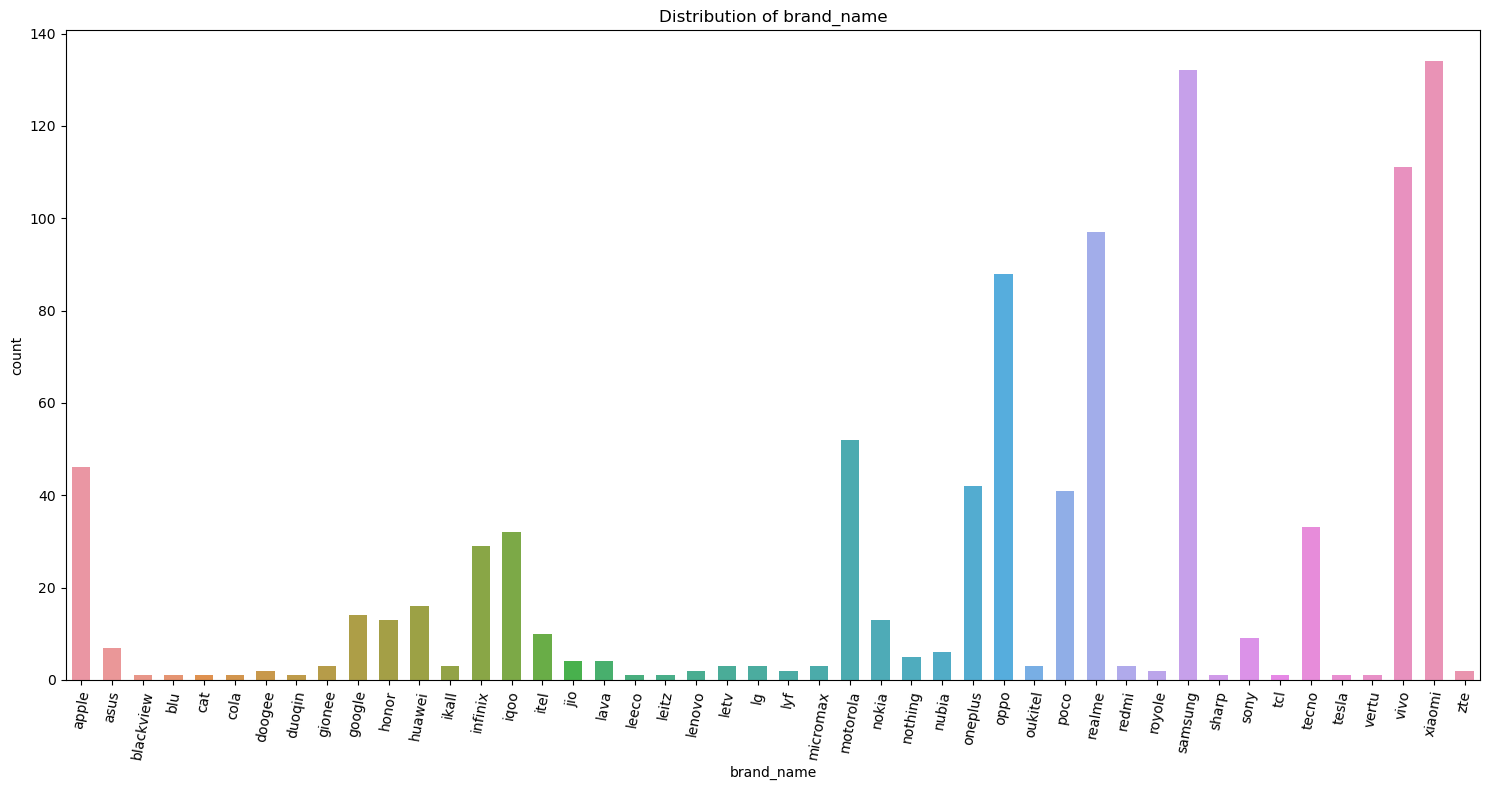

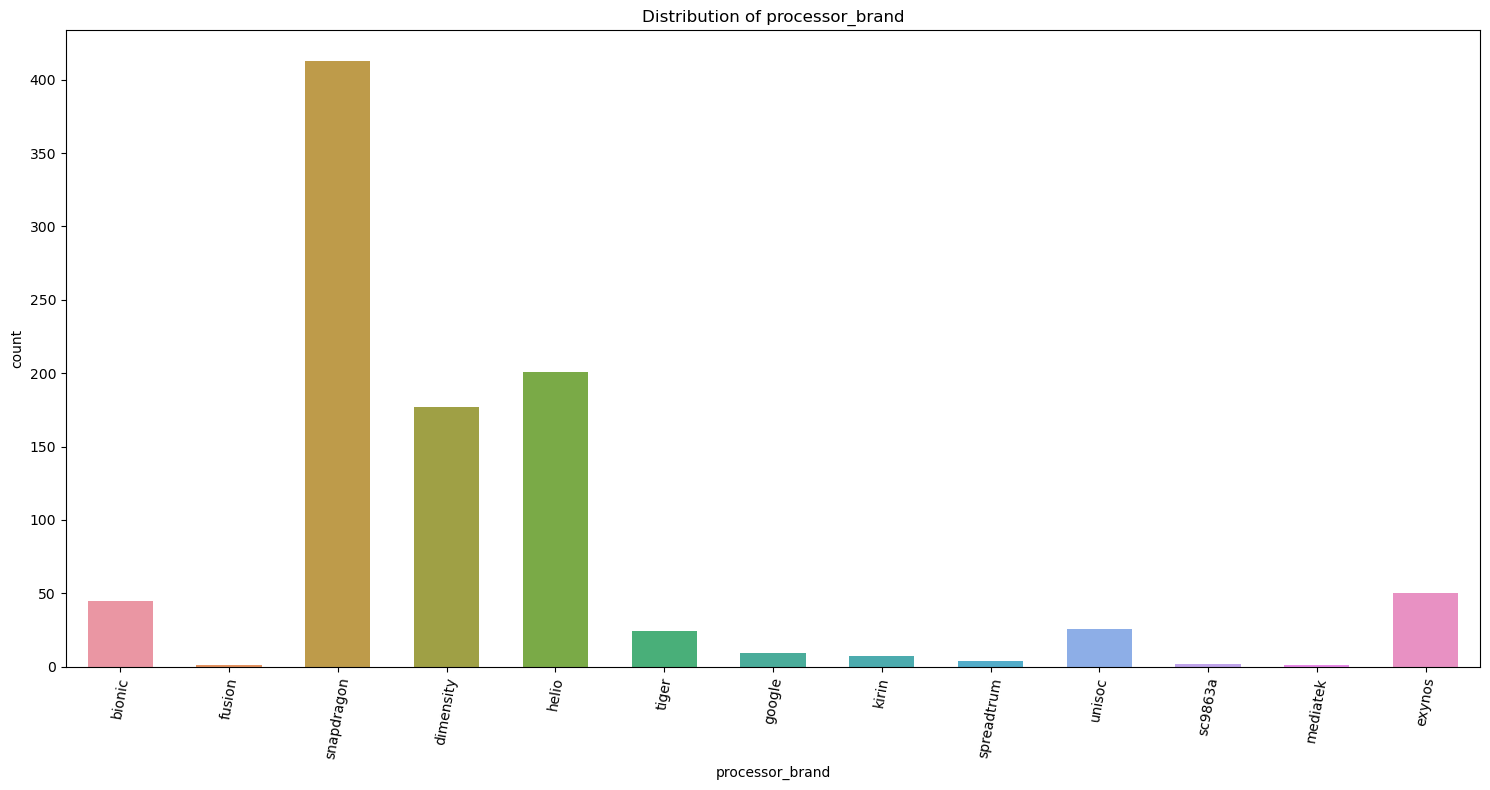

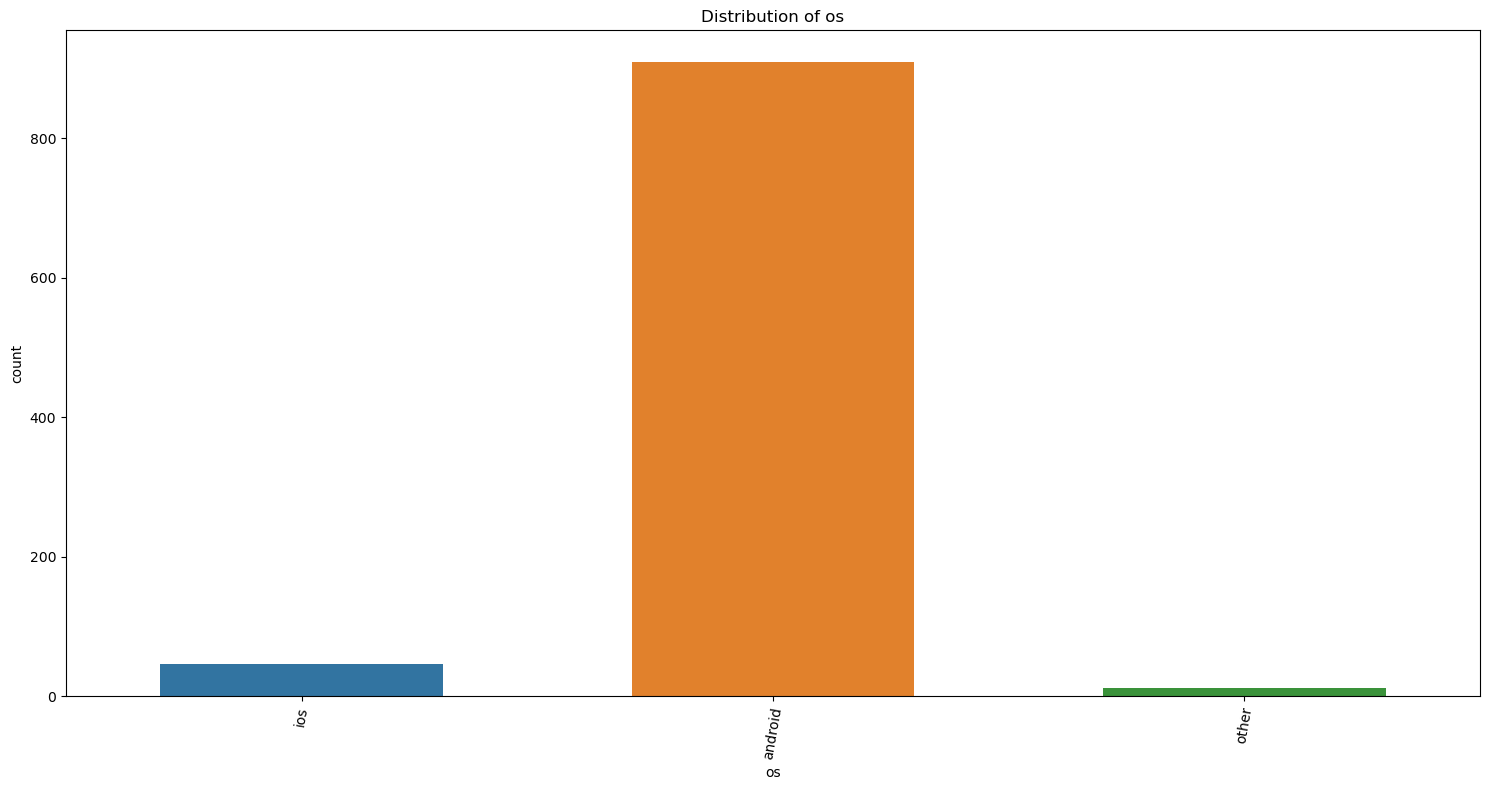

In [23]:
for i in ["brand_name","processor_brand","os"]:
    plt.figure(figsize=(15,8))
    sns.countplot(data=smartphones, x=i, width=0.6)
    plt.title(f"Distribution of {i}")
    plt.xticks(rotation=80)  
    plt.tight_layout()  
    plt.show()

It can be observed that phones from brands **"xiaomi, samsung, vivo, realme, oppo, motorola, and apple"** are predominant.

Among the processor brands, **"snapdragon, helio, and dimensity"** are predominant.

Regarding the operating system, **Android** is the dominant one.


### Column Corrections

In [25]:
def replace_cat(data, cat, old, new):
    """
    Update the DataFrame, specifying the variable to use, 
    the old category, and replacing it with the new category.
    """
    data[cat] = data[cat].str.replace(old,new, regex=False)

In [26]:
# Xiaomi
replace_cat(smartphones,"brand_name","redmi","xiaomi")
# Letv
replace_cat(smartphones,"brand_name","leeco","letv")
# Unicos
replace_cat(smartphones,"processor_brand","sc9863a","unisoc")
replace_cat(smartphones,"processor_brand","spreadtrum","unisoc")

In [27]:
for c in ["brand_name","processor_brand","os"]:
    print(f"Number of Variable Values: {c}")
    print()
    print(smartphones[c].unique())
    print()

Number of Variable Values: brand_name

['apple' 'asus' 'blackview' 'blu' 'cat' 'cola' 'doogee' 'duoqin' 'gionee'
 'google' 'honor' 'huawei' 'ikall' 'infinix' 'iqoo' 'itel' 'jio' 'lava'
 'letv' 'leitz' 'lenovo' 'lg' 'lyf' 'micromax' 'motorola' 'nokia'
 'nothing' 'nubia' 'oneplus' 'oppo' 'oukitel' 'poco' 'realme' 'xiaomi'
 'royole' 'samsung' 'sharp' 'sony' 'tcl' 'tecno' 'tesla' 'vertu' 'vivo'
 'zte']

Number of Variable Values: processor_brand

['bionic' 'fusion' 'snapdragon' 'dimensity' 'helio' 'tiger' 'google'
 'kirin' nan 'unisoc' 'mediatek' 'exynos']

Number of Variable Values: os

['ios' 'android' nan 'other']



## Null Analysis


In [28]:
def check_missing_data(data):
    return data.isnull().sum().sort_values(ascending=False)
check_missing_data(smartphones)

fast_charging                211
avg_rating                   101
processor_speed               42
processor_brand               20
os                            14
battery_capacity              11
num_cores                      6
primary_camera_front           5
brand_name                     0
refresh_rate                   0
resolution_height              0
extended_memory_available      0
primary_camera_rear            0
num_rear_cameras               0
ram_capacity                   0
screen_size                    0
internal_memory                0
model                          0
fast_charging_available        0
5G_or_not                      0
price                          0
resolution_width               0
dtype: int64

There are:
* 211 null values for charging speed.
* 101 null values for the average model rating.
* 42 null values for processor speed.
* 14 null values for the operating system.
* 11 null values for battery capacity.
* 6 null values for the number of cores.
* 5 null values for front camera quality.


### Handling Null Values


#### Charging Speed


Regarding the charging speed values, there are too many to estimate or replace. The best approach is to remove the column.


In [30]:
smartphones.drop("fast_charging", axis=1, inplace=True)

#### Average Rating


##### Apple

In [31]:
smartphones[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="apple")].describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,2.00000,0.0,2.000000,2.000000,2.000000,1.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0
mean,585.93000,NaN,0.500000,5.000000,2.795000,2230.0,0.0,3.500000,48.000000,4.7,60.0,1.0,12.500000,7.0,0.0,1334.0,750.0
std,77.73932,NaN,0.707107,1.414214,0.601041,NaN,0.0,0.707107,22.627417,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0
min,530.96000,NaN,0.000000,4.000000,2.370000,2230.0,0.0,3.000000,32.000000,4.7,60.0,1.0,12.000000,7.0,0.0,1334.0,750.0
25%,558.44500,NaN,0.250000,4.500000,2.582500,2230.0,0.0,3.250000,40.000000,4.7,60.0,1.0,12.250000,7.0,0.0,1334.0,750.0
50%,585.93000,NaN,0.500000,5.000000,2.795000,2230.0,0.0,3.500000,48.000000,4.7,60.0,1.0,12.500000,7.0,0.0,1334.0,750.0
75%,613.41500,NaN,0.750000,5.500000,3.007500,2230.0,0.0,3.750000,56.000000,4.7,60.0,1.0,12.750000,7.0,0.0,1334.0,750.0
max,640.90000,NaN,1.000000,6.000000,3.220000,2230.0,0.0,4.000000,64.000000,4.7,60.0,1.0,13.000000,7.0,0.0,1334.0,750.0


In [32]:
smartphones[(smartphones["brand_name"] == "apple") & (smartphones["price"] > 500) & (smartphones["price"] < 700) & ((3 <= smartphones["ram_capacity"]) & (smartphones["ram_capacity"] <= 4))]["avg_rating"].mean()

7.233333333333333

In [33]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="apple"),"avg_rating"] = 7.23

##### Xiaomi

In [34]:
smartphones[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="xiaomi") & (smartphones["price"] < 1000) & (smartphones["price"] > 600)]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
850,xiaomi,Xiaomi 12 Pro 5G (12GB RAM + 256GB),627.48,NaN,1,snapdragon,8.0,3.0,4600.0,1,...,256,6.73,120,3,android,50.0,32.0,0,3200,1440
851,xiaomi,Xiaomi 12 Ultra 5G,919.19,NaN,1,snapdragon,8.0,3.2,4800.0,1,...,256,6.73,120,3,android,50.0,20.0,0,3200,1440
852,xiaomi,Xiaomi 12S Ultra,846.52,NaN,1,snapdragon,8.0,3.2,4860.0,1,...,256,6.73,120,3,android,50.0,32.0,0,3200,1440
856,xiaomi,Xiaomi 13 Pro 5G,713.47,NaN,1,snapdragon,8.0,3.2,4820.0,1,...,128,6.73,120,3,android,50.3,32.0,0,3200,1440
857,xiaomi,Xiaomi 13 Ultra 5G,870.82,NaN,1,snapdragon,8.0,3.2,5000.0,1,...,256,6.60,120,4,android,108.0,32.0,0,3200,1440


In [35]:
smartphones[(smartphones["avg_rating"].isnull() == False) & (smartphones["brand_name"]=="xiaomi") & (smartphones["price"] < 1000) & (smartphones["price"] > 600)]["avg_rating"].mean()

8.82

In [36]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="xiaomi") & (smartphones["price"] < 1000) & (smartphones["price"] > 600),"avg_rating"] = 8.82

In [37]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="xiaomi"),]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
873,xiaomi,Xiaomi Mi Mix Alpha,2418.84,NaN,1,snapdragon,8.0,2.96,4050.0,1,...,512,7.92,60,3,android,108.0,NaN,0,2250,2088
874,xiaomi,Xiaomi Mi Mix Fold,1330.31,NaN,1,snapdragon,8.0,2.84,5020.0,1,...,256,8.01,90,3,android,108.0,20.0,0,2480,1860
875,xiaomi,Xiaomi Mix Fold 2 5G,1294.03,NaN,1,snapdragon,8.0,3.20,4500.0,1,...,256,8.02,120,3,android,50.0,20.0,0,2160,1914
906,xiaomi,Xiaomi Redmi A1,74.64,NaN,0,helio,4.0,2.00,5000.0,1,...,32,6.52,60,2,android,8.0,5.0,1,1600,720


In [38]:
smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="xiaomi") & (smartphones["num_cores"]==8) & (smartphones["processor_brand"]=="snapdragon") & (smartphones["price"] > 800),"avg_rating"].mean()

8.815000000000001

In [39]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="xiaomi"),"avg_rating"] = 8.81

##### Samsung

In [40]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="samsung"),].sort_values("price")

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
555,samsung,Samsung Galaxy A01 Core,60.46,NaN,0,mediatek,4.0,1.50,3000.0,0,...,16,5.30,60,1,android,8.0,5.0,1,1480,720
558,samsung,Samsung Galaxy A03 Core,78.60,NaN,0,unisoc,4.0,1.60,5000.0,0,...,32,6.50,60,1,android,8.0,5.0,1,1600,720
604,samsung,Samsung Galaxy A73 5G (8GB RAM + 256GB),507.86,NaN,1,snapdragon,8.0,2.40,5000.0,1,...,256,6.70,120,4,android,108.0,32.0,1,2400,1080
603,samsung,Samsung Galaxy A73 5G,507.97,NaN,1,snapdragon,8.0,2.40,5000.0,1,...,128,6.70,120,4,android,108.0,32.0,1,2400,1080
605,samsung,Samsung Galaxy A74 5G,520.07,NaN,1,snapdragon,8.0,2.36,5000.0,1,...,128,6.70,120,4,android,108.0,32.0,1,2412,1080
660,samsung,Samsung Galaxy S20 Plus 5G,1040.03,NaN,1,exynos,8.0,2.73,4500.0,1,...,128,6.70,60,4,android,64.0,10.0,1,3200,1440
673,samsung,Samsung Galaxy S22 Ultra 5G,1112.71,NaN,1,snapdragon,8.0,3.00,5000.0,1,...,256,6.80,120,4,android,108.0,40.0,0,3080,1440
675,samsung,Samsung Galaxy S22 Ultra 5G (8GB RAM + 128GB),1209.36,NaN,1,snapdragon,8.0,3.00,5000.0,1,...,128,6.80,120,4,android,108.0,40.0,0,3080,1440
661,samsung,Samsung Galaxy S20 Ultra 5G,1209.47,NaN,1,exynos,8.0,2.73,5000.0,1,...,128,6.90,60,4,android,108.0,40.0,1,3200,1440
667,samsung,Samsung Galaxy S21 Ultra 5G (12GB RAM + 128GB),1233.66,NaN,1,exynos,8.0,2.90,5000.0,1,...,128,6.80,120,4,android,108.0,40.0,0,3200,1440


In [41]:
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] <= 100),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] > 100) & (smartphones["price"] < 600),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] > 600) & (smartphones["price"] < 1000),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] >= 1000),"avg_rating"].mean())

6.6
7.732291666666666
8.545454545454545
8.787500000000001


In [42]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] <= 100),"avg_rating"] = 6.6
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] > 100) & (smartphones["price"] < 600),"avg_rating"] = 7.73
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] > 600) & (smartphones["price"] < 1000),"avg_rating"] = 8.54
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="samsung")  & (smartphones["price"] > 1000),"avg_rating"] = 8.78

##### Vivo

In [43]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="vivo"),].sort_values("price")

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
821,vivo,Vivo Y25,90.70,NaN,0,helio,4.0,1.30,1900.0,0,...,16,4.50,60,1,android,5.0,2.0,1,854,480
796,vivo,Vivo Y02 (2GB RAM + 32GB),96.75,NaN,0,helio,8.0,NaN,5000.0,1,...,32,6.51,60,1,android,8.0,5.0,1,1600,720
841,vivo,Vivo Y91c,99.17,NaN,0,helio,8.0,2.00,4030.0,0,...,32,6.22,60,1,android,13.0,5.0,1,1520,720
795,vivo,Vivo Y02,108.84,NaN,0,helio,8.0,NaN,5000.0,1,...,32,6.51,60,1,android,8.0,5.0,1,1600,720
831,vivo,Vivo Y55S,163.16,NaN,0,snapdragon,4.0,1.20,2730.0,0,...,16,5.20,60,1,android,13.0,5.0,1,1280,720
834,vivo,Vivo Y71,302.37,NaN,0,snapdragon,4.0,1.40,3360.0,0,...,16,6.00,60,1,android,13.0,5.0,1,1440,720
791,vivo,Vivo X90 Pro 5G,689.39,NaN,1,dimensity,8.0,3.05,4870.0,1,...,256,6.78,120,3,android,50.3,32.0,0,2800,1260
792,vivo,Vivo X90 Pro Plus 5G,895.00,NaN,1,snapdragon,8.0,3.20,4700.0,1,...,256,6.78,120,4,android,50.3,32.0,0,3200,1440
788,vivo,Vivo X80 Pro 5G,967.57,NaN,1,snapdragon,8.0,3.00,4700.0,1,...,256,6.78,120,4,android,50.0,32.0,0,3200,1440
785,vivo,Vivo X Note 5G (12GB RAM + 512GB),1003.75,NaN,1,snapdragon,8.0,3.00,5000.0,1,...,512,7.00,120,4,android,50.0,16.0,0,3080,1440


In [44]:
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] <= 100),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] > 100) & (smartphones["price"] < 400),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] > 400) & (smartphones["price"] < 700),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] >= 700),"avg_rating"].mean())

6.05
7.653571428571431
8.544444444444444
8.8


In [45]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] <= 100),"avg_rating"] = 6.05
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] > 100) & (smartphones["price"] < 400),"avg_rating"] = 7.65
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] > 400) & (smartphones["price"] < 700),"avg_rating"] = 8.54
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="vivo")  & (smartphones["price"] >= 700),"avg_rating"] = 8.8

##### Realme

In [46]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="realme"),].sort_values("price")

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
498,realme,Realme C30,64.09,NaN,0,tiger,8.0,1.82,5000.0,0,...,32,6.5,60,1,android,8.0,5.0,1,1600,720
538,realme,Realme Narzo 50i,78.50,NaN,0,unisoc,8.0,1.60,5000.0,0,...,32,6.5,60,1,android,8.0,5.0,1,1600,720
494,realme,Realme C2,84.65,NaN,0,helio,8.0,2.00,4000.0,0,...,16,6.1,60,2,android,13.0,5.0,1,720,1560
500,realme,Realme C30s,86.42,NaN,0,unisoc,8.0,1.60,5000.0,1,...,32,6.5,60,1,android,8.0,5.0,1,1600,720
490,realme,Realme A1,108.84,NaN,0,helio,8.0,2.10,4000.0,0,...,16,6.2,60,2,android,13.0,8.0,1,1520,720


In [47]:
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="realme")  & (smartphones["num_cores"] == 8) & (smartphones["refresh_rate"]==60),"avg_rating"].mean())

6.7821428571428575


In [48]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="realme"),"avg_rating"] = 6.85

##### Oppo

In [49]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="oppo"),].sort_values("price")

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
374,oppo,Oppo Find X3 Pro,616.72,NaN,1,snapdragon,8.0,2.84,4500.0,1,...,256,6.70,120,4,android,50.0,32.0,0,3216,1440
377,oppo,Oppo Find X6 Pro,943.28,NaN,1,snapdragon,8.0,3.20,4700.0,1,...,256,6.78,120,3,android,50.0,32.0,0,2400,1080
375,oppo,Oppo Find X5 Pro 5G,967.46,NaN,1,snapdragon,8.0,3.00,5000.0,1,...,256,6.70,120,3,android,50.0,32.0,0,3216,1440
369,oppo,Oppo Find N 5G,1115.74,NaN,1,snapdragon,8.0,2.84,4500.0,1,...,256,7.10,120,3,android,50.0,32.0,0,1920,1792
372,oppo,Oppo Find N2 5G,1148.89,NaN,1,snapdragon,8.0,3.20,4520.0,1,...,256,7.10,120,3,NaN,50.0,32.0,0,1920,1792
371,oppo,Oppo Find N Fold,1209.36,NaN,1,snapdragon,8.0,3.20,5000.0,1,...,256,7.10,120,2,other,50.0,NaN,0,1920,1792


In [50]:
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="oppo") & (smartphones["price"] > 500)  & (smartphones["price"] <= 700),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="oppo")  & (smartphones["price"] > 700) & (smartphones["price"] < 1000),"avg_rating"].mean())
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="oppo")  & (smartphones["price"] >= 1000),"avg_rating"].mean())

8.6
8.833333333333334
8.7


In [51]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="oppo")  & (smartphones["price"] <= 700),"avg_rating"] = 8.6
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="oppo")  & (smartphones["price"] > 700) & (smartphones["price"] < 1000),"avg_rating"] = 8.83
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="oppo")  & (smartphones["price"] >= 1000),"avg_rating"] = 8.7

##### Motorola

In [52]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="motorola"),].sort_values("price")

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
250,motorola,Motorola Moto X30 Pro,507.86,NaN,1,snapdragon,8.0,3.2,4450.0,1,...,128,6.67,144,3,android,200.0,60.0,0,2400,1080
208,motorola,Motorola Edge 30 Ultra,665.20,NaN,1,snapdragon,8.0,3.2,4610.0,1,...,128,6.67,144,3,android,200.0,60.0,0,2400,1080
224,motorola,Motorola Moto Edge X30 Pro,725.57,NaN,1,snapdragon,8.0,3.2,4450.0,1,...,128,6.67,144,3,android,200.0,60.0,0,2340,1080
209,motorola,Motorola Edge 30 Ultra (12GB RAM + 256GB),725.68,NaN,1,snapdragon,8.0,3.2,4610.0,1,...,256,6.67,144,3,android,200.0,60.0,0,2400,1080


In [53]:
print(smartphones.loc[(smartphones["avg_rating"].isnull()==False) & (smartphones["brand_name"]=="motorola")  & (smartphones["num_cores"] == 8) & (smartphones["refresh_rate"]==144) & (smartphones["price"] > 500) & (smartphones["price"] < 800),"avg_rating"].mean())

8.8


In [54]:
smartphones.loc[(smartphones["avg_rating"].isnull()) & (smartphones["brand_name"]=="motorola") ,"avg_rating"] = 8.8

##### Remaining Values


In [55]:
smartphones["avg_rating"].isnull().sum()

44

In [56]:
smartphones.dropna(subset=["avg_rating"], inplace=True)

#### Processor Brand


In [57]:
smartphones.loc[(smartphones["processor_brand"].isnull()) & (smartphones["brand_name"] == "samsung"),]

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
567,samsung,Samsung Galaxy A05,157.11,6.3,0,NaN,8.0,NaN,5000.0,1,...,64,6.50,60,2,android,48.0,5.0,1,1560,720
568,samsung,Samsung Galaxy A11,120.83,6.3,0,NaN,8.0,1.8,4000.0,1,...,32,6.40,60,3,android,13.0,8.0,1,1560,720
571,samsung,Samsung Galaxy A13,174.77,7.5,0,NaN,8.0,2.0,5000.0,1,...,64,6.60,60,4,android,50.0,8.0,1,2408,1080
572,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),181.41,7.5,0,NaN,8.0,2.0,5000.0,1,...,128,6.60,60,4,android,50.0,8.0,1,2408,1080
573,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),199.55,7.8,0,NaN,8.0,2.0,5000.0,1,...,128,6.60,60,4,android,50.0,8.0,1,2408,1080
578,samsung,Samsung Galaxy A15,193.40,6.3,0,NaN,8.0,NaN,5000.0,1,...,64,6.50,60,3,android,48.0,8.0,1,1600,720
615,samsung,Samsung Galaxy F14,181.30,6.7,0,NaN,8.0,NaN,5000.0,1,...,64,6.62,60,3,android,50.0,16.0,1,1080,2408
641,samsung,Samsung Galaxy M35,278.17,7.4,0,NaN,8.0,NaN,6000.0,1,...,128,6.50,60,3,android,64.0,32.0,1,2400,1080
642,samsung,Samsung Galaxy M51s 5G,302.25,7.2,1,NaN,8.0,NaN,6000.0,1,...,128,6.70,60,3,android,64.0,32.0,1,2400,1080
643,samsung,Samsung Galaxy M52s 5G,302.25,7.4,1,NaN,8.0,NaN,5000.0,1,...,128,6.50,60,3,android,64.0,32.0,1,2400,1080


In [58]:
smartphones.loc[(smartphones["processor_brand"].isnull()==False) & (smartphones["brand_name"] == "samsung") & ((smartphones["processor_brand"] == "helio")|(smartphones["processor_brand"] == "snapdragon")),].groupby("processor_brand").median()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
processor_brand,,,,,,,,,,,,,,,,,
helio,145.86,7.25,0.0,8.0,2.30,5000.0,1.0,4.0,96.0,6.500,60.0,4.0,48.0,8.0,1.0,1600.0,720.0
snapdragon,532.16,8.60,1.0,8.0,2.84,4600.0,1.0,8.0,128.0,6.685,120.0,3.0,50.0,10.0,1.0,2408.0,1080.0


In [59]:
smartphones.loc[(smartphones["processor_brand"].isnull()) & (smartphones["brand_name"] == "samsung" ) & (smartphones["price"] <= 200),"processor_brand"] = "helio"
smartphones.loc[(smartphones["processor_brand"].isnull()) & (smartphones["brand_name"] == "samsung" ) & (smartphones["price"] > 200),"processor_brand"] = "snapdragon"
smartphones.loc[(smartphones["processor_brand"].isnull()) & (smartphones["brand_name"] == "huawei" ),"processor_brand"] = "kirin"
smartphones.loc[(smartphones["processor_brand"].isnull()),"processor_brand"] = "snapdragon"

#### Processor Speed


In [60]:
smartphones.loc[(smartphones["processor_speed"].isnull()),].value_counts("processor_brand")

processor_brand
bionic        14
snapdragon    11
helio          5
exynos         4
google         4
dimensity      2
kirin          1
dtype: int64

In [61]:
procesadores = ["bionic","snapdragon","helio","exynos","google","dimensity","dimensity","kirin"]
for p in procesadores:
    media = smartphones.loc[(smartphones["processor_speed"].isnull()==False) & (smartphones["processor_brand"]==p),"processor_speed"].median()
    if media:
        smartphones.loc[(smartphones["processor_speed"].isnull()==True) & (smartphones["processor_brand"]==p),"processor_speed"] = media

#### OS

After investigating, it was found that those with null values for their operating system, except for "Huawei Mate Xs 2," all use Android.


In [63]:
smartphones.loc[(smartphones["os"].isnull()) & (smartphones["brand_name"] != "huawei"),"os"] = "android"
smartphones.loc[(smartphones["os"].isnull()) & (smartphones["brand_name"] == "huawei"),"os"] = "other"

#### Number of Cores, Front Camera Quality, and Battery Capacity


In [64]:
# Complete num_cores with its median
smartphones["num_cores"].fillna(8.00, inplace=True)

# Complete primary_camera_front with its median
smartphones["primary_camera_front"].fillna(16.00, inplace=True)

# Complete battery_capacity with its mean
smartphones["battery_capacity"].fillna(5000.00, inplace=True)


#### Any Remaining Null Values?


In [65]:
smartphones.isnull().sum().sort_values(ascending=False)

brand_name                   0
internal_memory              0
resolution_height            0
extended_memory_available    0
primary_camera_front         0
primary_camera_rear          0
os                           0
num_rear_cameras             0
refresh_rate                 0
screen_size                  0
ram_capacity                 0
model                        0
fast_charging_available      0
battery_capacity             0
processor_speed              0
num_cores                    0
processor_brand              0
5G_or_not                    0
avg_rating                   0
price                        0
resolution_width             0
dtype: int64

### Conclusion of the Accomplished Tasks


In [66]:
r, c = smartphones.shape
print(f"After the work, there are {r} rows and {c} columns remaining.")


After the work, there are 936 rows and 21 columns remaining.


Before addressing the missing values in the variables, there were 980 rows and 22 columns. After the work to correct the null values, there are now 936 rows and 21 columns.

Addressing the null values resulted in the loss of 4.5% of the rows and 4.5% of the columns.

**Summary of Accomplishments:**
* Regarding **charging speed**, the number of nulls was significantly high, so I decided to remove the column.
* For the **average model rating**, the number of nulls was 101, but 57 of them belonged to the predominant brands in the dataset. Thus, I filtered models with similar characteristics to those with null ratings and assigned them the median rating of their respective filters, only removing 44 rows.
* Concerning **processor brands**, I assigned the predominant brands based on models of the same brand and similar price.
* For **processor speed**, I assigned the median speed for each processor brand.
* For the **operating system**, since there were few nulls, I researched and assigned the appropriate systems.
* Finally, for **number of cores**, **front camera quality**, and **battery capacity**, I assigned the median values from the dataset for those respective features.
